# Lab_04 Validation
### Context
#### Cross Validation
+ The Set of Train, Valid, Test 
+ k-Fold Cross Validation with Stratify

#### Parameter Tuning
+ Grid Search

#### Ensemble
+ Voting Ensemble
+ Out-of-fold(OOF) Ensemble

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### 데이터 정보

    train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 
    test.csv - 폐업 여부를 제외하고 train.csv와 동일 
    sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



    inst_id - 각 파일에서의 병원 고유 번호
    OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
    sido – 병원의 광역 지역 정보
    sgg – 병원의 시군구 자료
    openDate – 병원 설립일
    bedCount - 병원이 갖추고 있는 병상의 수
    instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
    ·        종합병원 : 입원환자 100명 이상 수용 가능
    ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    ·        의원 : 입원 환자 30명 이하 수용 가능
    ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
    revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
    salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
    sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
    salary1 – 급여, 2017(회계년도)년 데이터를 의미함
    noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
    noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
    Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
    ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
    Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
    liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
    quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
    receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
    inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
    nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
    tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
    OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
    receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
    debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
    liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
    shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
    NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
    longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
    netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
    surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
    revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
    salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
    sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
    salary2 – 급여, 2016(회계년도)년 데이터를 의미함
    noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
    noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
    interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
    ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
    profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
    liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
    quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
    receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
    inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
    nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
    tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
    OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
    receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
    Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
    liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
    shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
    NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
    longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
    netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
    surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
    employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
    employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
    ownerChange – 대표자의 변동 

In [2]:
hospital_train = join('data', join('Hospital', 'train.csv'))
hospital_test  = join('data', join('Hospital', 'test.csv'))

data = pd.read_csv(hospital_train)
label = data['OC']

test = pd.read_csv(hospital_test)

In [3]:
data.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [4]:
data.shape

(301, 58)

In [5]:
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [7]:
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [8]:
test.describe()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.000000,0.0,127.000000,1.260000e+02,119.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,...,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,205.905512,NaN,95.858268,2.005085e+07,172.789916,1.824446e+10,3.973321e+09,1.340410e+10,7.415084e+09,5.175513e+08,...,1.336209e+10,3.513831e+08,1.973114e+04,1.189851e+10,5.633432e+09,2.181713e+09,6.495026e+09,4.482682e+09,6.116179e+09,1.648474e+09
std,131.801765,NaN,52.684253,8.795815e+04,126.024471,3.133530e+10,1.419948e+10,2.054481e+10,1.210043e+10,1.193139e+09,...,2.085404e+10,9.791097e+08,2.206009e+05,1.971182e+10,9.662048e+09,4.952449e+09,1.203673e+10,7.517020e+09,9.813461e+09,4.779444e+09
min,2.000000,NaN,6.000000,1.976041e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.955957e+09,-8.600000e+09
25%,89.000000,NaN,51.000000,2.000083e+07,94.000000,3.235889e+09,0.000000e+00,3.083860e+09,1.666742e+09,1.641094e+07,...,2.807763e+09,0.000000e+00,0.000000e+00,1.679896e+09,3.914156e+08,0.000000e+00,1.321368e+08,0.000000e+00,9.492656e+08,0.000000e+00
50%,199.000000,NaN,95.000000,2.007107e+07,156.000000,6.637116e+09,1.896923e+08,5.716502e+09,3.263054e+09,5.319171e+07,...,5.450483e+09,3.317377e+07,0.000000e+00,4.494217e+09,1.554506e+09,3.000000e+08,2.030000e+09,1.750000e+09,2.427139e+09,0.000000e+00
75%,328.000000,NaN,144.500000,2.011790e+07,213.000000,1.704039e+10,1.192329e+09,1.445243e+10,7.198103e+09,3.714592e+08,...,1.187114e+10,2.048998e+08,0.000000e+00,1.412031e+10,6.586241e+09,2.650000e+09,5.700000e+09,4.857048e+09,5.881965e+09,6.935165e+08
max,431.000000,NaN,177.000000,2.017053e+07,771.000000,1.810000e+11,1.160000e+11,1.270000e+11,8.239561e+10,7.302719e+09,...,1.130000e+11,7.112780e+09,2.466393e+06,1.310000e+11,5.241427e+10,3.714334e+10,7.855654e+10,3.620288e+10,4.924492e+10,2.561787e+10


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [10]:
pd.isna(data).sum().sum()

425

In [11]:
pd.isna(test).sum().sum()

272

2주차 강의에서 사용한 전처리 코드를 그대로 가져와 사용하겠습니다.

#### 전처리

In [12]:
# 발생한 에러처리
test['employee1'] = test['employee1'].map(lambda x: x.replace(',', '') if isinstance(x, str) else x)
test['employee2'] = test['employee2'].map(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# 자료형 변경
test['employee1'] = test['employee1'].astype(np.float64)
test['employee2'] = test['employee2'].astype(np.float64)

##### 클래스 분포 확인
- 해당 데이터는 극심한 클래스가 불균형한 데이터셋 입니다. 이런 데이터의 경우 Open으로 찍어버리면 거의 95%의 정확도가 나옵니다.

In [13]:
(data['OC'] == 'open').sum(), (data['OC'] == ' close').sum()

(286, 15)

##### 불필요한 컬럼 삭제
- openDate는 병원이 개업한 년월일로 실제로는 중요한 변수일 수 있으나, 우리 강의가 데이터 전처리에 치중된 강의가 아니므로 일단은 제거하겠습니다.
- 일반적으로 년월일은 1년 단위 또는 10년 단위로 범주형 변수로 만들어 전처리합니다.

In [14]:
data.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)

test.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)

##### 수치형 변수 컬럼 및 범주형 변수 컬럼

In [15]:
# DF.info에서 Object type을 가진 컬럼은 모두 범주형 변수
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
['sido', 'instkind', 'ownerChange']

 Numeric Columns: 
['sgg', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2']



#### 라벨 데이터 인코딩

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
label = le.fit_transform(label)

#### 전처리 프로세스 함수로 만들기 (실습 15분)

In [17]:
from sklearn.preprocessing import StandardScaler

def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()
    
    # 결측치 처리
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_valid = tmp_x_valid.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    x_train_mean = np.mean(tmp_x_train[num_columns], axis=0)
    x_train_mode = tmp_x_train[cat_columns].mode()
    
    for c in num_columns:
        # x_train의 평균 값으로 x_train, x_valid 수치형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mean[c]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mean[c]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mean[c]
    
    for c in cat_columns:
        # x_train의 최빈 값으로 x_train, x_valid 범주형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mode[c][0]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mode[c][0]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mode[c][0]
        
    
    # 스케일링
    scaler = StandardScaler()
    tmp_x_train[num_columns] = scaler.fit_transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns]  = scaler.transform(tmp_x_test[num_columns])

    # 인코딩
    ohe = OneHotEncoder(sparse=False)

    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_valid[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)
    #ex)만약 train에는 category중에 제주도가 있는데, valid와 test에 제주도가 없으면, 제주도(ex)인코딩 결과 01000이라 하자)를
    #   포함시킨 상태에서 onehot encoder에 fitting시켜야 한다

    ohe.fit(x_all)
    
    ohe_columns = list()
    for col in ohe.categories_:
        ohe_columns += col.tolist()

    new_x_train_cat = pd.DataFrame(ohe.transform(tmp_x_train[cat_columns]), columns=ohe_columns)
    new_x_valid_cat = pd.DataFrame(ohe.transform(tmp_x_valid[cat_columns]), columns=ohe_columns)
    new_x_test_cat =  pd.DataFrame(ohe.transform(tmp_x_test[cat_columns]),  columns=ohe_columns)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, new_x_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_valid, tmp_x_test

 #### tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1) 
 #### tmp_x_valid = pd.concat([tmp_x_valid, new_x_valid_cat], axis=1)
 #### tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1) 
 위 코드에서 만약 전에 밑에 코드 처리가 안됐다면 <br>
 #### tmp_x_train = tmp_x_train.reset_index(drop=True)
 #### tmp_x_valid = tmp_x_valid.reset_index(drop=True)
 #### tmp_x_test  = tmp_x_test.reset_index(drop=True)
 tmp_x_train과 new_x_train_cat(encoding된 범주형 변수)이 axis = 1로 붙는데, 만약 index drop을 안 시켜 뒀다면,<br>
 옆으로 붙을 때 중구난방으로 붙어서 막 공백 생기고 이상해진다
    

## Cross Validation
### 1. Train, Valid, Test Set
훈련, 검증, 테스트 데이터라고 부르는 3가지를 한번 이야기 해보겠습니다.<br>
* Train Data : 모델을 학습하는데 사용하는 데이터 (모델이 알고 있는 학습할 데이터, 과거 데이터)
* Valid Data : 학습한 모델의 성능을 검증하는 데이터 (모델이 모르는 학습하지 않을 데이터, 모델 검증에 사용하는 데이터, 과거 데이터)
* Test Data : 학습한 모델로 예측할 데이터 (모델이 모르는 예측할 데이터, 미래 데이터)

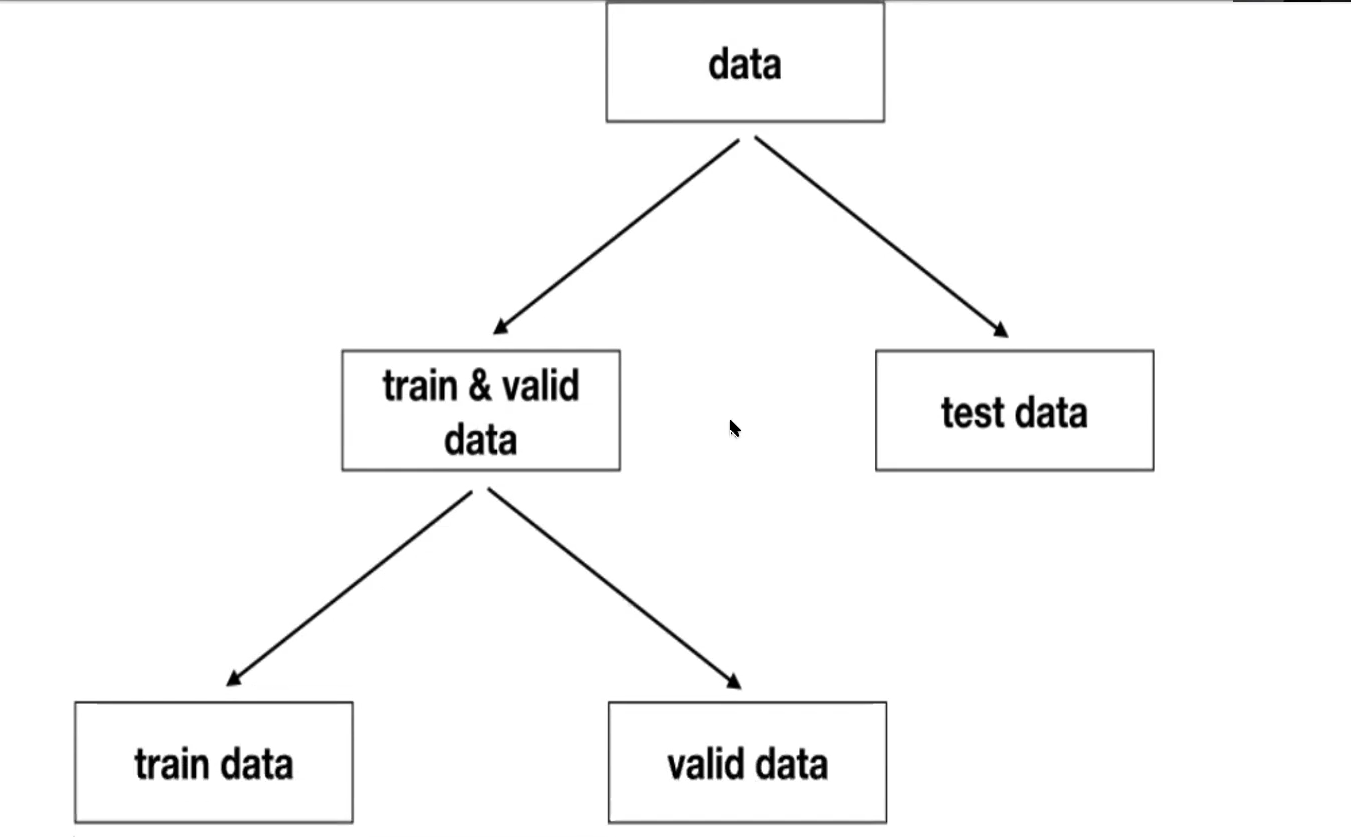


##### 데이터 쪼개기, Train -> (Train, Valid)
- train_test_split 파라미터 
    - test_size  (float): Valid(test)의 크기의 비율을 지정
    - random_state (int): 데이터를 쪼갤 때 내부적으로 사용되는 난수 값 (해당 값을 지정하지 않으면 매번 달라집니다.)
    - shuffle     (bool): 데이터를 쪼갤 때 섞을지 유무
    - stratify   (array): Stratify란, 쪼개기 이전의 클래스 비율을 쪼개고 나서도 유지하기 위해 설정해야하는 값입니다. 클래스 라벨을 넣어주면 됩니다.
        - ex) 원본 Train 데이터의 클래스 비율이 (7:3) 이었다면, 쪼개어진 Train, Valid(test) 데이터의 클래스 비율도 (7:3)이 됩니다. 당연히 분류 데이터에서만 사용할 수 있습니다.

In [18]:
from sklearn.model_selection import train_test_split

# 쪼개어진 Train, Valid 데이터의 비율은 (7:3), 내부 난수 값 2020, 데이터를 쪼갤 때 섞으며 label 값으로 Stratify 하는 코드 입니다. random_state를 주석 처리하고 데이터를 확인해보시면 계속 바뀝니다.
x_train, x_valid, y_train, y_valid = train_test_split(data, label, 
                                                      test_size=0.3,
                                                      random_state=2021,
                                                      shuffle=True,
                                                      stratify=label)

In [19]:
data.shape, x_train.shape, x_valid.shape

((301, 55), (210, 55), (91, 55))

### 2. k-fold with stratify
k-fold는 데이터를 k개로 쪼개는 것을 말합니다. <br>
일반적으로 Cross Validation에서 사용되며, 데이터셋을 k개로 쪼개어 k-1개로 모델을 학습하고, 1개로 모델을 검증합니다. <br>
k개로 데이터를 쪼개면, 모든 fold에 대해(하나의 fold를 선택하여) 검증하는 방식으로 k번 다른 데이터셋으로 학습한 모델을 검증할 수 있습니다.
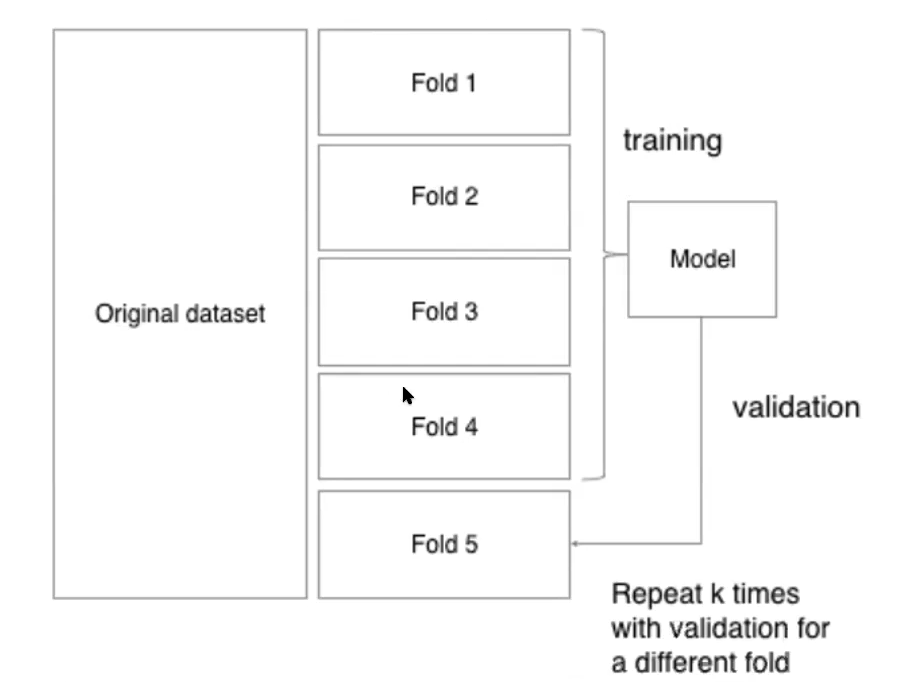

#### Stratify, 계층적 k-fold는 뭔가요?
k-fold는 데이터의 정렬 유무와 분류할 클래스의 비율에 상관없이 순서대로 데이터를 분할하는 특징이 있습니다.<br>
하지만, 분류할 클래스의 비율이 다르다면 어떻게 될까요? 그런 경우에는, 각 fold가 학습 데이터셋을 대표한다고 말하기 어려워집니다.<br>
한 fold에 특정 클래스가 많이 나올수도, 적게 나올수도 있기 때문입니다. Stratified k-fold는 그러한 문제점을 해결하기 위해 제안되었습니다.<br>
k개의 fold도 분할한 이후에도, 전체 훈련 데이터의 클래스 비율과 각 fold가 가지고 있는 클래스의 비율을 맞추어 준다는 점이 기존의 k-fold와의 다른 특징 입니다. 

## k-fold => 보통 회귀 문제에 쓰임
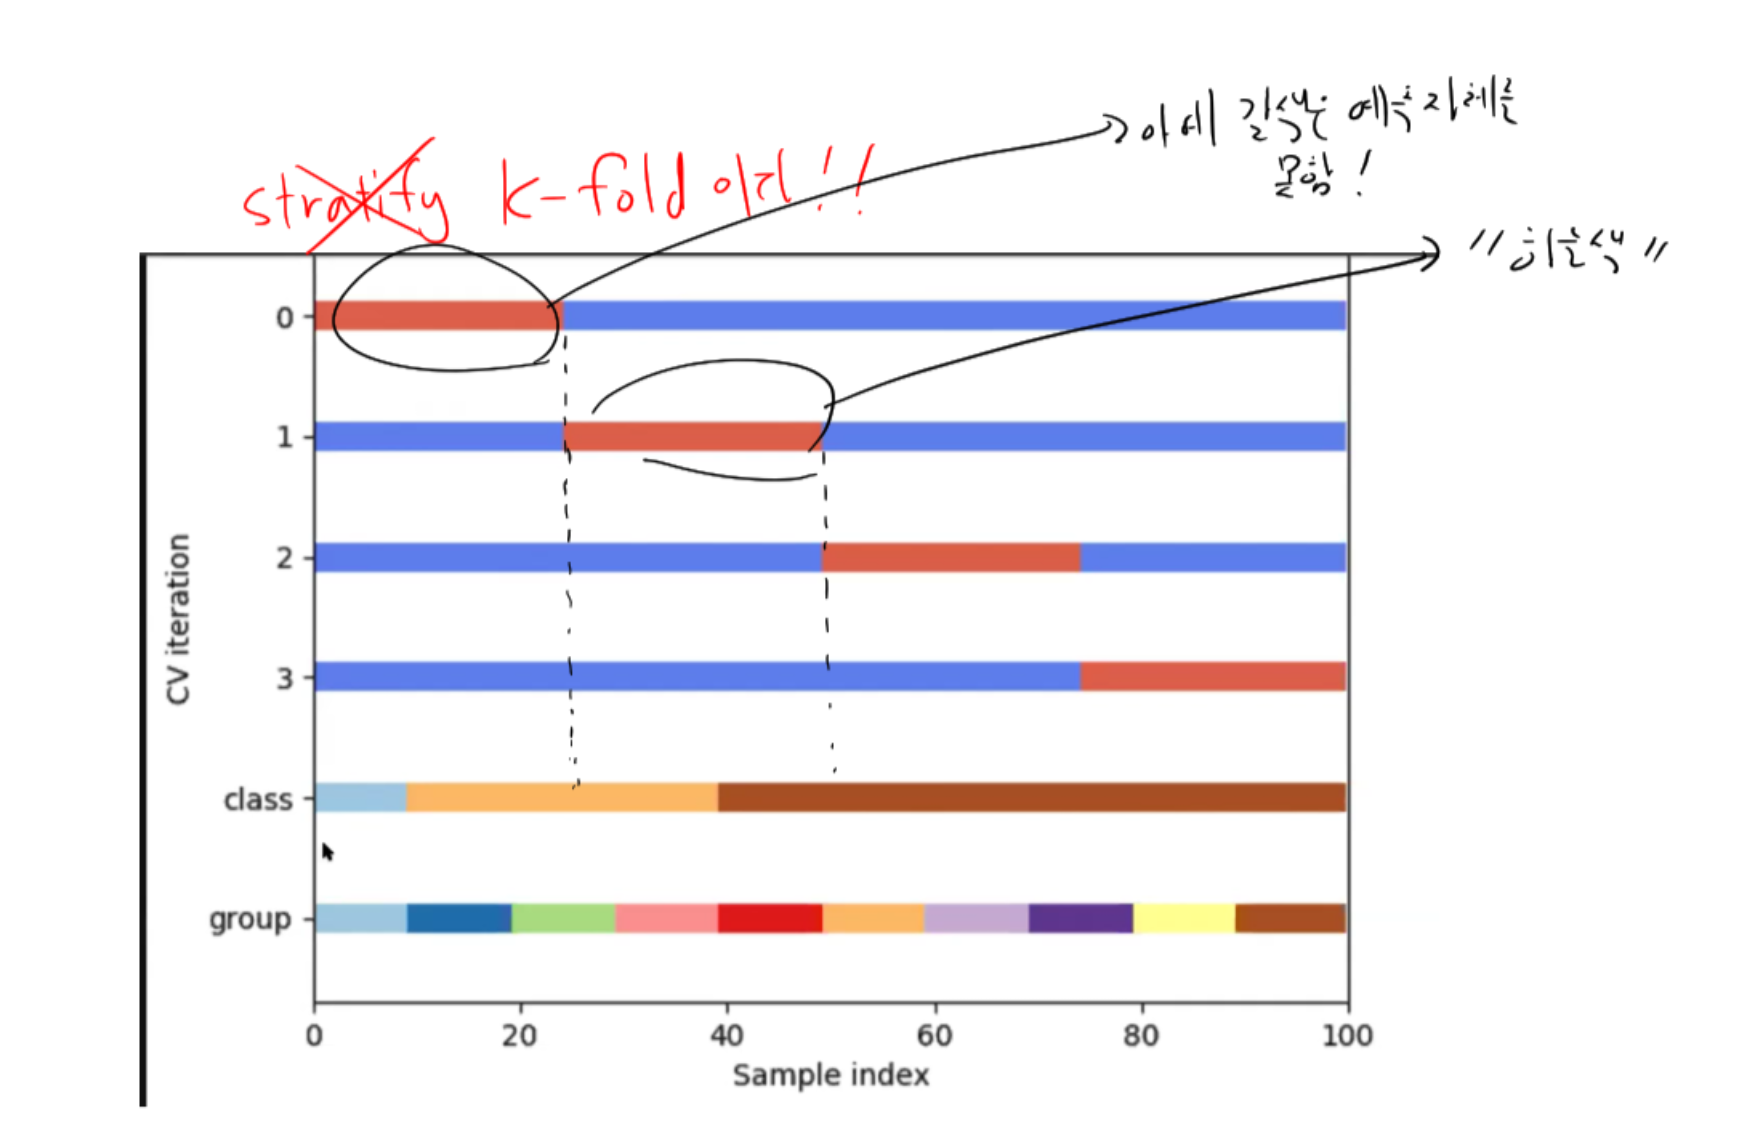
## Stratified k-fold => 보통 분류 문제에 쓰임
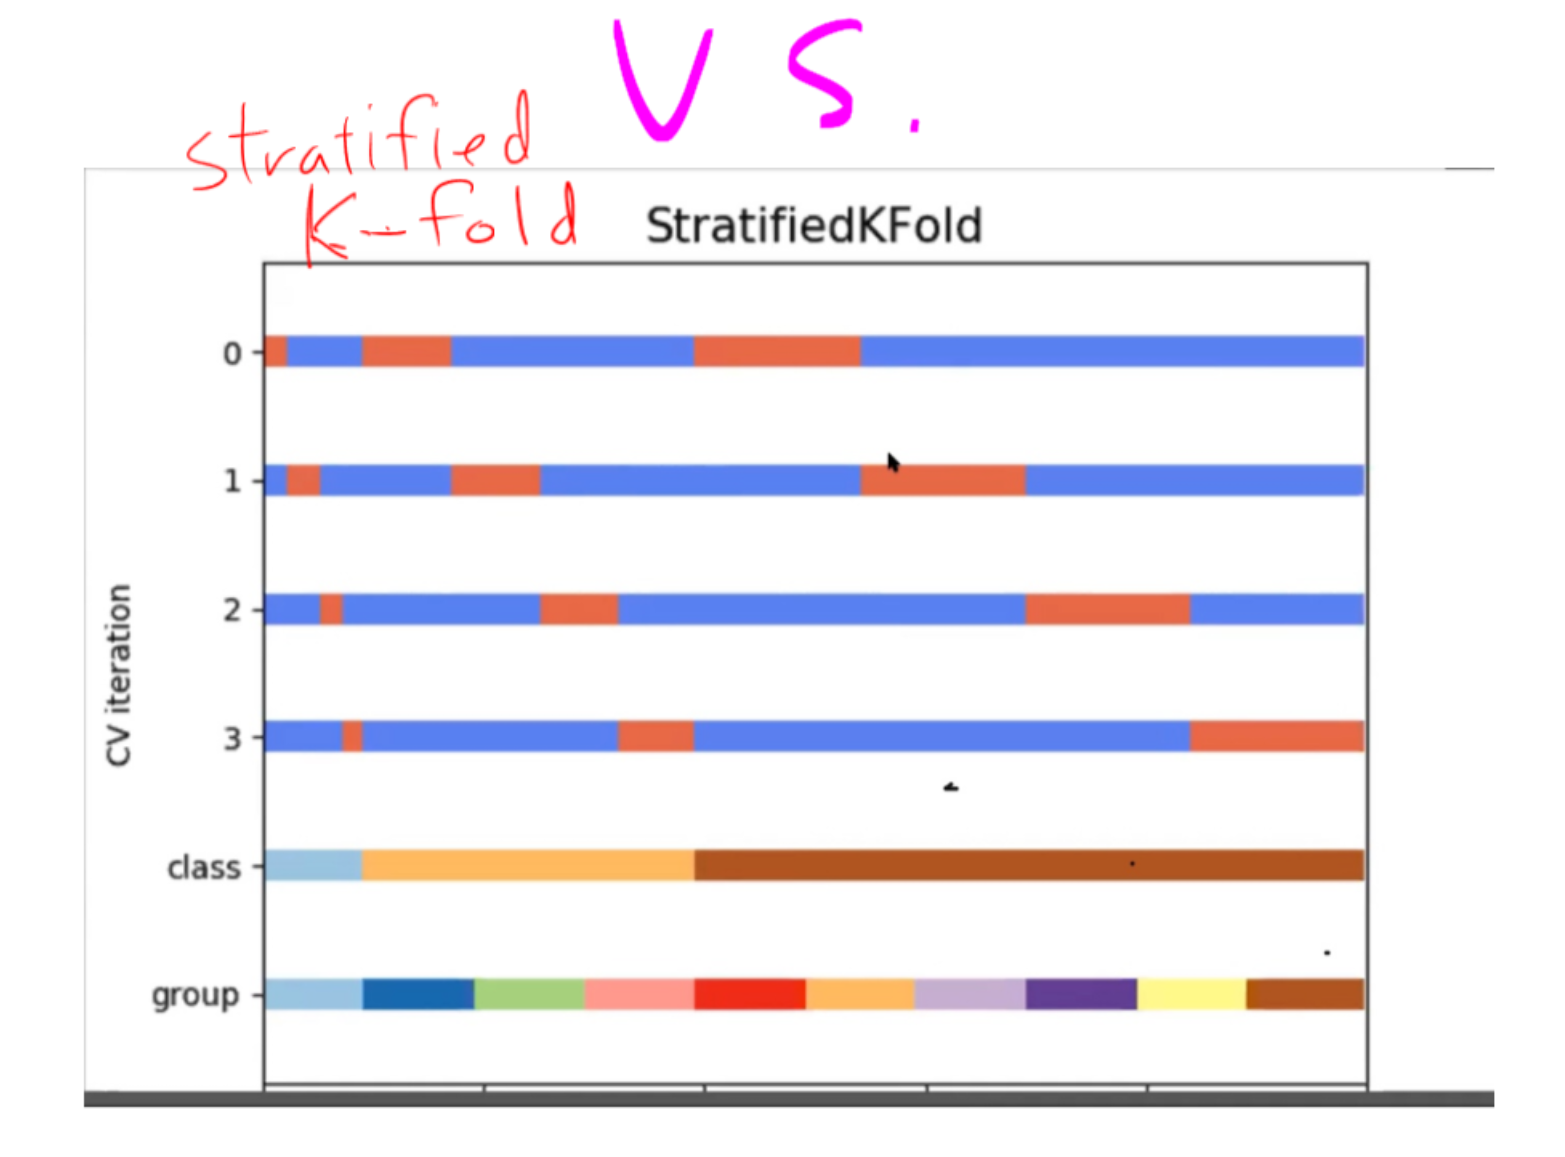

#### k-Fold
k-fold는 말 그대로 데이터를 k개로 쪼갭니다. <br>
k의 개수를 조절하여 몇개의 fold를 만들지 결정할 수 있습니다.

k-fold는 sklearn의 model_selection 패키지에 있습니다.

- KFold 대표 파라미터
    - n_splits      (int)  : Fold의 개수 k 값
    - shuffle       (bool) : 데이터를 쪼갤 때 섞을지 유무
    - random_state  (int)  : 내부적으로 사용되는 난수값

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2021)#k개의 model을 만들때 보통 5개의 k를 쓴다(n_spits가 k-fold에서 k의미)

### kf 에서는 label이 필수 인자가 아니지만, 밑에 skf(stratified kf) 코드 에서는 label이 필수 인자이다, bc/label을 골고루 섞는게 startify의 목적이기 때문에

### https://sgmath.tistory.com/61 꼭 참고하기!! 그리고 예전에는 ex)8:2로 분리된 data값이 반환되었지만, 여기는 분리된 index의 값이 반환된다!!!!

In [21]:
for i, (trn_idx, val_idx) in enumerate(kf.split(data, label)): 
    x_train, y_train = data.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = data.iloc[val_idx, :], label[val_idx]
    
    print('{} Fold, trn label\n Open: {}, Close: {}'.format(i,   np.sum(y_train == 1), np.sum(y_train == 0)))
    print('{} Fold, val label\n Open: {}, Close: {}\n'.format(i, np.sum(y_valid == 1), np.sum(y_valid == 0)))

0 Fold, trn label
 Open: 228, Close: 12
0 Fold, val label
 Open: 58, Close: 3

1 Fold, trn label
 Open: 234, Close: 7
1 Fold, val label
 Open: 52, Close: 8

2 Fold, trn label
 Open: 229, Close: 12
2 Fold, val label
 Open: 57, Close: 3

3 Fold, trn label
 Open: 226, Close: 15
3 Fold, val label
 Open: 60, Close: 0

4 Fold, trn label
 Open: 227, Close: 14
4 Fold, val label
 Open: 59, Close: 1



In [22]:
trn_idx

array([  0,   1,   2,   3,   4,   6,   8,   9,  10,  12,  13,  14,  15,
        16,  18,  20,  22,  23,  24,  26,  28,  29,  30,  31,  32,  34,
        35,  36,  37,  38,  39,  41,  42,  43,  45,  46,  47,  48,  51,
        52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  64,  65,  66,
        67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  83,  85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115,
       117, 118, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146,
       147, 148, 149, 150, 151, 153, 154, 156, 158, 160, 161, 162, 163,
       165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179,
       180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193,
       195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 22

#### stratify k-Fold

Stratified k-fold는 sklearn의 model_selection 패키지에 있습니다.

- StratifiedKFold 대표 파라미터
    - n_splits      (int)  : Fold의 개수 k 값
    - shuffle       (bool) : 데이터를 쪼갤 때 섞을지 유무
    - random_state  (int)  : 내부적으로 사용되는 난수값

In [23]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [24]:
for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = data.iloc[val_idx, :], label[val_idx]
    
    print('{} Fold, trn label\n Open: {}, Close: {}'.format(i,   np.sum(y_train == 1), np.sum(y_train == 0)))
    print('{} Fold, val label\n Open: {}, Close: {}\n'.format(i, np.sum(y_valid == 1), np.sum(y_valid == 0)))

0 Fold, trn label
 Open: 228, Close: 12
0 Fold, val label
 Open: 58, Close: 3

1 Fold, trn label
 Open: 229, Close: 12
1 Fold, val label
 Open: 57, Close: 3

2 Fold, trn label
 Open: 229, Close: 12
2 Fold, val label
 Open: 57, Close: 3

3 Fold, trn label
 Open: 229, Close: 12
3 Fold, val label
 Open: 57, Close: 3

4 Fold, trn label
 Open: 229, Close: 12
4 Fold, val label
 Open: 57, Close: 3



#### Cross Validation 해보기 (실습 15분)
Stratified k-fold를 이용해 Cross Validation을 진행해 보겠습니다. 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import f1_score

val_scores = list()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx], label[trn_idx]
    x_valid, y_valid = data.iloc[val_idx], label[val_idx]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, test)
    #!!!!여기 윗줄에서 주위할것은, x_train과 x_valid는 계속 갱신돼서, 같은 변수를 써도 노 상관인데, test같은 경우는 test와 x_test
    #처럼 이름을 다르게 해줘야 한다. bc/~,~,test = ~,~,test일케하면 처음for문 돌때는 아무 문제도 없지만 두번째부터 오류생김 ㅠㅠ 
    
    # 모델 정의
    clf = RandomForestClassifier(random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)

    # 훈련, 검증 데이터 f1_score 확인
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid, y_pred)
    print('{} Fold, train f1_score : {:.4f}, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)

# 교차 검증 f1_score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train f1_score : 0.9978, validation f1_score : 0.9661
1 Fold, train f1_score : 0.9978, validation f1_score : 0.9744
2 Fold, train f1_score : 0.9978, validation f1_score : 0.9655
3 Fold, train f1_score : 0.9957, validation f1_score : 0.9744
4 Fold, train f1_score : 0.9978, validation f1_score : 0.9655
Cross Validation Score : 0.9692


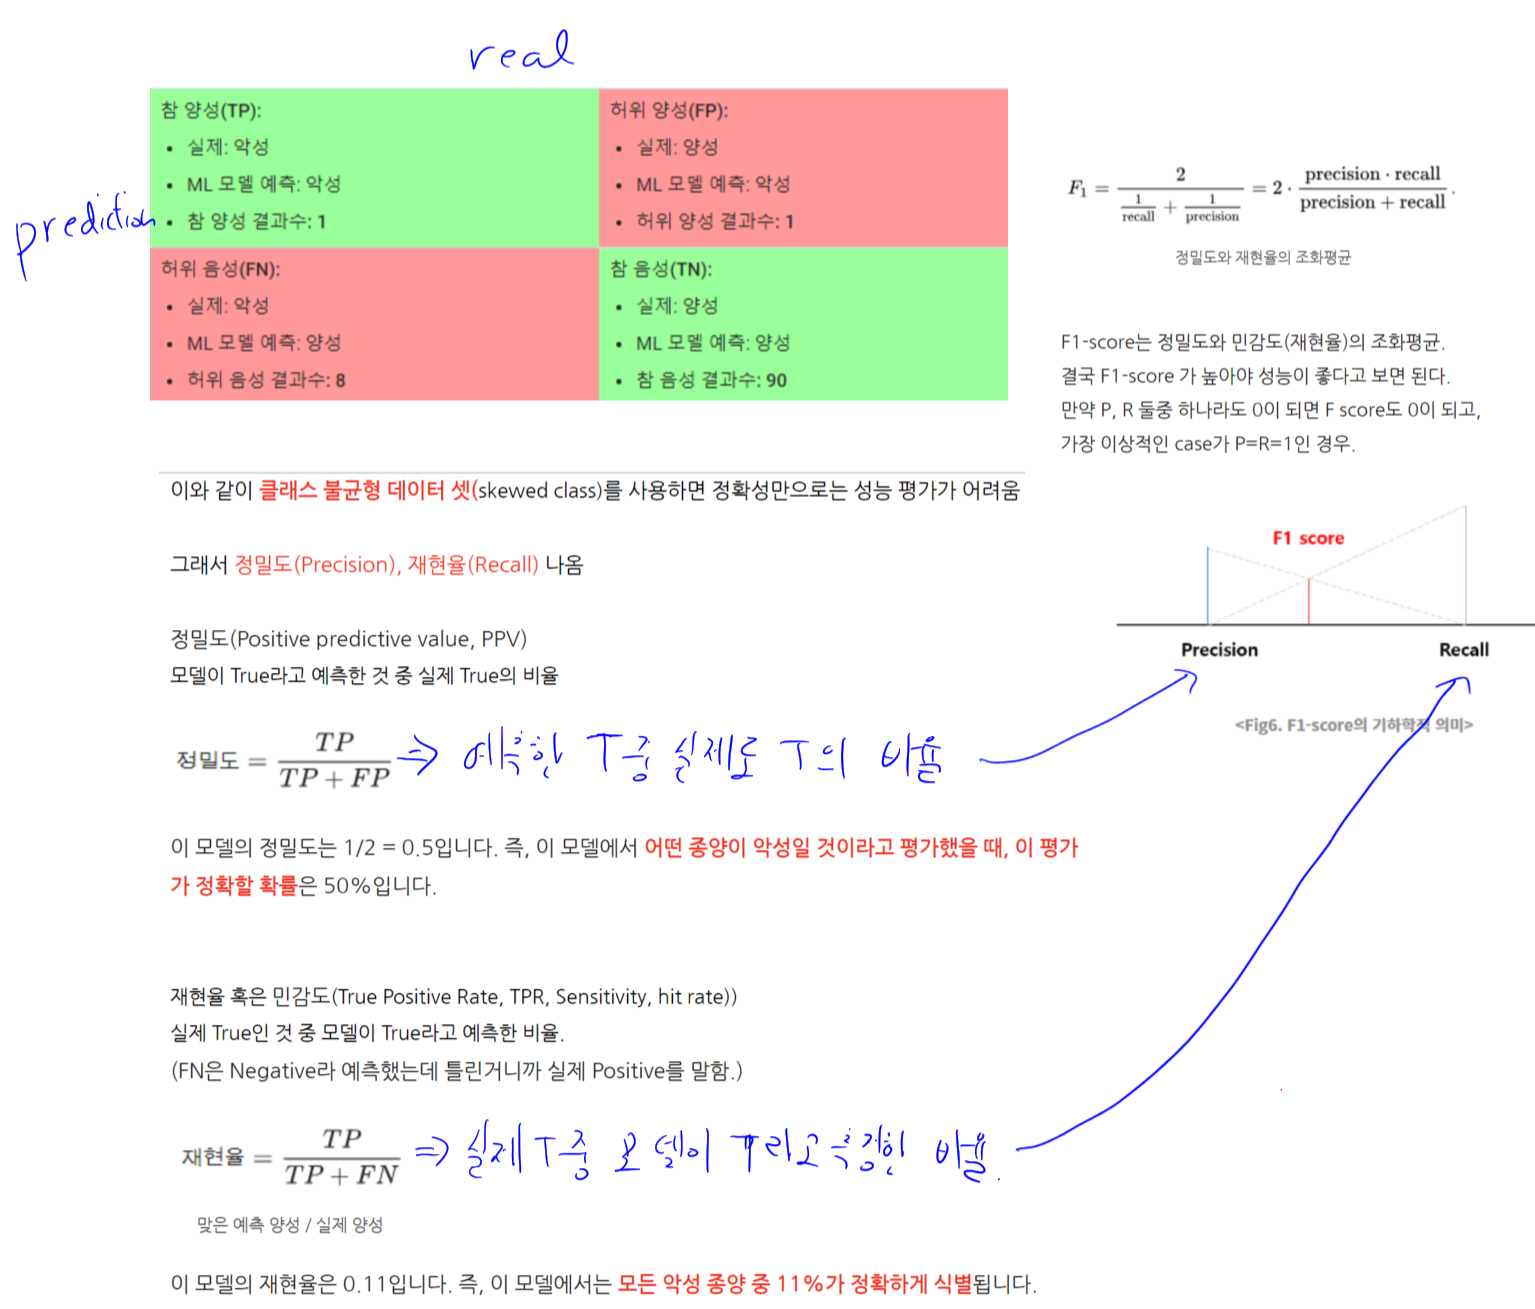

## Parameter Tuning
### GridSearch 
모델에는 여러가지 파라미터가 들어갑니다. SVC의 경우 Soft, Hard 마진의 정도를 결정하는 'C' 커널 함수를 결정하는 'kernel' 특정 커널에서 얼마나 세세하게 볼것인지를 결정하는 'gamma' 등 <br>
파라미터를 어떻게 결정하느냐에 따라 모델이 잘 학습하거나 잘 학습하지 못하는 경우가 발생할 수 있습니다. <br>
Sklearn에서 가장 쉽게 제공하는 파라미터 튜닝 함수로 GridSearchCV 라는 함수가 있습니다. 해당 함수에 각 파라미터에 사용할 수치 리스트를 전달하면, 해당 함수는 파라미터들의 조합을 모두 시도해보며,<br>
가장 좋은 성능의 파라미터를 찾게 됩니다. 

간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimators, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

#### 1) 모델 정의 및 불러오기

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
params = {'n_estimators':[50, 100, 150],#n_estimators는 생성할 tree의 개수이다
          'max_depth':[3, 5, 7, 10]}

clf = GridSearchCV(RandomForestClassifier(random_state=2021), 
                   params, n_jobs=4, scoring='f1')

#### 2) 모델 학습하기

### 여기서 3*4 = 12개의 model들을 다 돌려본다!!!(RandomForest(n_estimator = 50, max_depth = 3), RandomForest(n_estimator = 50, max_depth = 5), RandomForest(n_estimator = 50, max_depth = 7)...RandomForest(n_estimator = 150, max_depth = 10))

In [28]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021), n_jobs=4,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

#### 3,4) 예측 및 결과 확인

In [29]:
print('GridSearchCV best f1 score : {:.4f}, best_params : {}'.format(clf.best_score_, clf.best_params_))

GridSearchCV best f1 score : 0.9745, best_params : {'max_depth': 3, 'n_estimators': 50}


In [30]:
f1_score(y_valid, clf.predict(x_valid))

0.9743589743589743

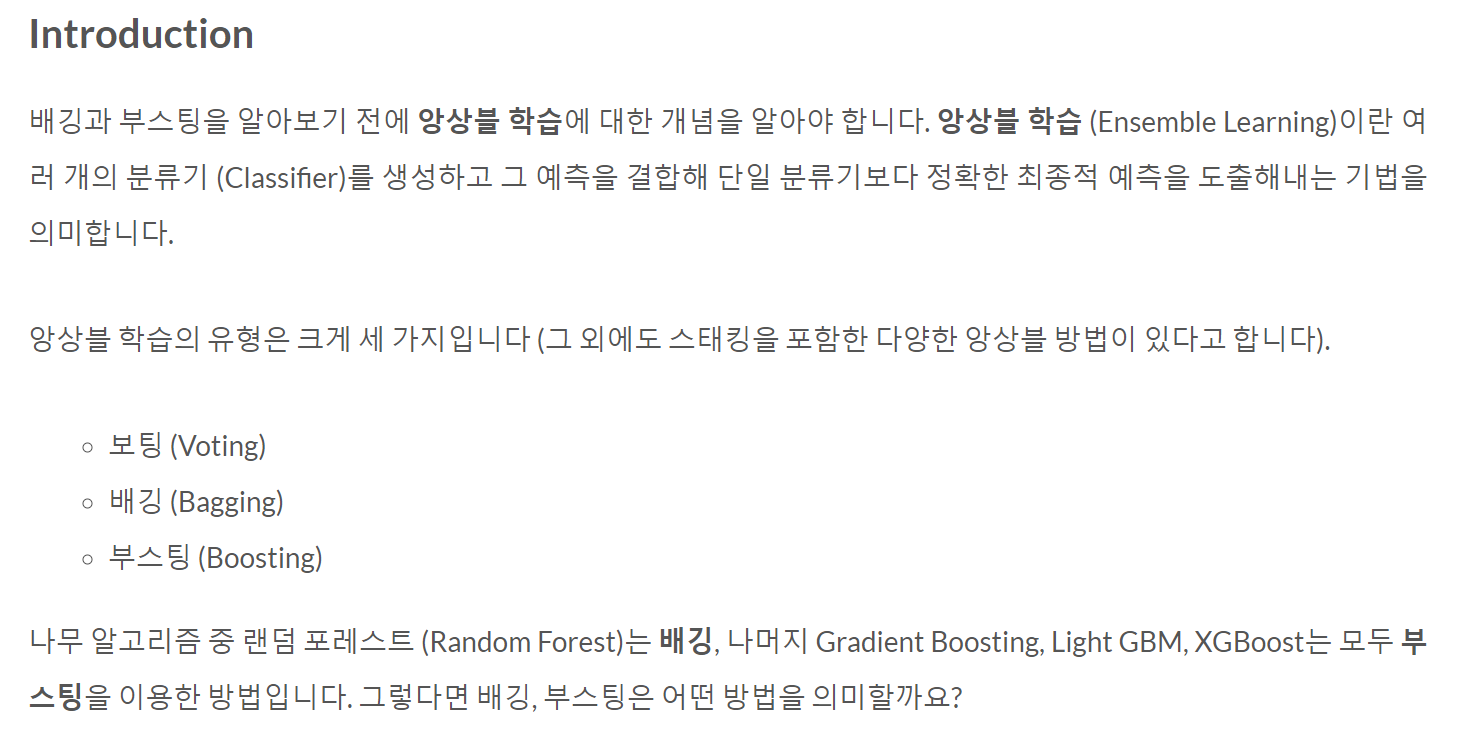

## Lab3(randomforest(bagging중 하나)),Gradient boost파일 보고 오기

### baggin과 boosting의 차이에 대한 설명이 나와있음1.https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting 

2.https://assaeunji.github.io/ml/2020-08-06-tree/

## Ensemble
개인적으로 앙상블은 머신러닝의 꽃이라고 생각합니다. 단일 모델로 좋은 성능을 이끄는 것도 중요하지만, 서로 다른 모델의 다양성을 고려하여 결과를 이끌어내는 앙상블은 응용할 수 있는 방법이 매우 많습니다. <br>
그 중 대표적인 2가지 앙상블에 대해 실습하고 배워보도록 하겠습니다. 

### Voting Ensemble  http://blog.naver.com/PostView.nhn?blogId=winddori2002&logNo=221829427442&parentCategoryNo=1&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView (voting, bagging관련 설명나와있음!!)
이름에서 알 수 있듯이 각자의 모델이 투표를 하여 클래스를 선택하는 방식의 앙상블 입니다. <br>
Voting 앙상블은 Sklearn 자체적으로 모델로써 지원을 하며, 사용하기도 매우 쉽습니다. <br>
그리고 Hard, Soft로 Voting 방식이 나뉘는데, Hard는 라벨 값으로 투표를 하는 방식이고, Soft는 확률 값을 모두 더해 가장 높은 클래스를 선택합니다.

Voting Classifier는 Sklearn의 ensemble 패키지에 있습니다.

##### 앙상블 성능 비교를 위해 임시로 데이터를 나누겠습니다.

In [31]:
from sklearn.model_selection import train_test_split

# 쪼개어진 Train, Valid 데이터의 비율은 (7:3), 내부 난수 값 2020, 데이터를 쪼갤 때 섞으며 label 값으로 Stratify 하는 코드 입니다. random_state를 주석 처리하고 데이터를 확인해보시면 계속 바뀝니다.
tmp_x_train, tmp_x_valid, tmp_y_train, tmp_y_valid = train_test_split(data, label, 
                                                                       test_size=0.3,
                                                                       random_state=2021,
                                                                       shuffle=True,
                                                                       stratify=label)

In [32]:
tmp_x_train, tmp_x_valid, _ = preprocess(tmp_x_train, tmp_x_valid, test) #_ 는 걍 데이터를 버리겠다는 것이다

#### 1) 모델 불러오기 및 정의하기

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

clfs = [['Logistic', LogisticRegression()],
        ['RandomForest', RandomForestClassifier()],
        ['MLP', MLPClassifier()]]

vote_clf = VotingClassifier(clfs, voting='soft', n_jobs=4)

#### 2) 모델 학습하기

In [34]:
vote_clf.fit(tmp_x_train, tmp_y_train)

VotingClassifier(estimators=[['Logistic', LogisticRegression()],
                             ['RandomForest', RandomForestClassifier()],
                             ['MLP', MLPClassifier()]],
                 n_jobs=4, voting='soft')

#### 3) 결과 확인하기

In [35]:
print('Validation F1 score : {:.4f}'.format(f1_score(tmp_y_valid, 
                                                     vote_clf.predict(tmp_x_valid))))

Validation F1 score : 0.9718


### 2. Out-of-fold(OOF) Ensemble (같이 푸는 실습)
OOF 앙상블은 KFold 교차 검증에서 생성되는 각 Fold에 대한 예측 값을 앙상블하는 기법으로 모델 검증과 함께 앙상블을 진행할 수 있다는 장점이 있습니다. <br>

Cross Validation 파트에서 배웠던 KFold 코드를 재사용해 OOF 앙상블을 진행해보겠습니다.

In [36]:
from sklearn.model_selection import train_test_split

# 쪼개어진 Train, Valid 데이터의 비율은 (7:3), 내부 난수 값 2021, 데이터를 쪼갤 때 섞으며 label 값으로 Stratify 하는 코드 입니다. random_state를 주석 처리하고 데이터를 확인해보시면 계속 바뀝니다.
tmp_x_data, tmp_x_test, tmp_y_data, tmp_y_test = train_test_split(data, label, 
                                                                   test_size=0.3,
                                                                   random_state=2021,
                                                                   shuffle=True,
                                                                   stratify=label)

In [37]:
tmp_x_data.shape

(210, 55)

In [38]:
tmp_x_test.shape

(91, 55)

In [39]:
tmp_y_data.shape

(210,)

In [40]:
tmp_y_test.shape

(91,)

In [37]:
val_scores = list()
oof_pred = np.zeros((tmp_x_test.shape[0], le.classes_.shape[0]))

for i, (trn_idx, val_idx) in enumerate(skf.split(tmp_x_data, tmp_y_data)):
    x_train, y_train = tmp_x_data.iloc[trn_idx], tmp_y_data[trn_idx]
    x_valid, y_valid = tmp_x_data.iloc[val_idx], tmp_y_data[val_idx]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, tmp_x_test)
    
    # 모델 정의
    clf = RandomForestClassifier(random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid, clf.predict(x_valid))
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)
    
    oof_pred += clf.predict_proba(x_test) / 5

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

# OOF valid F1 Score 계산하기
print('OOF Validation Score : {:.4f}'.format(f1_score(tmp_y_test, np.argmax(oof_pred, axis=1))))

0 Fold, train f1_score : 1.00004, validation f1_score : 0.9500
1 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
2 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
3 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
4 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
Cross Validation Score : 0.9705
OOF Validation Score : 0.9718


### Reference
- Validation 데이터가 필요한 이유 : https://3months.tistory.com/118
- Sklearn, KFold : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- Sklearn, StratifedKFold : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
- Sklearn, Compare with KFold, StratifedKFold : https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
- Sklearn, Cross Validation Score : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html&sa=U&ved=0ahUKEwiGxeHhqubhAhUKV7wKHbFhDrcQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0rIHEJ1ltDaghFv1bvPeRO
- Sklearn, GridSearchCV : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Sklearn, Voting Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

## 실습 솔루션

### 1) 전처리 함수 만들기

In [38]:
from sklearn.preprocessing import StandardScaler

def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()
    
    # 결측치 처리
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_valid = tmp_x_valid.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    x_train_mean = np.mean(tmp_x_train[num_columns], axis=0)
    x_train_mode = tmp_x_train[cat_columns].mode()
    
    for c in num_columns:
        # x_train의 평균 값으로 x_train, x_valid 수치형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mean[c]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mean[c]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mean[c]
    
    for c in cat_columns:
        # x_train의 최빈 값으로 x_train, x_valid 범주형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mode[c][0]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mode[c][0]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mode[c][0]
        
    
    # 스케일링
    scaler = StandardScaler()
    tmp_x_train[num_columns] = scaler.fit_transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns]  = scaler.transform(tmp_x_test[num_columns])

    # 인코딩
    ohe = OneHotEncoder(sparse=False)

    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_valid[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)

    ohe.fit(x_all)
    
    ohe_columns = list()
    for col in ohe.categories_:
        ohe_columns += col.tolist()

    new_x_train_cat = pd.DataFrame(ohe.transform(tmp_x_train[cat_columns]))
    new_x_valid_cat = pd.DataFrame(ohe.transform(tmp_x_valid[cat_columns]))
    new_x_test_cat =  pd.DataFrame(ohe.transform(tmp_x_test[cat_columns]))

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, new_x_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_valid, tmp_x_test

### 2) Cross Validation  실습 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics   import f1_score

val_scores = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label[val_idx,]
    
    # 전처리
    x_train, x_valid, _ = preprocess(x_train, x_valid, test)
    
    # 모델 정의
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 정확도 확인
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid, clf.predict(x_valid))
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)

# 교차 검증 정확도 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train f1_score : 0.99784, validation f1_score : 0.9661
1 Fold, train f1_score : 0.99784, validation f1_score : 0.9744
2 Fold, train f1_score : 0.99784, validation f1_score : 0.9655
3 Fold, train f1_score : 0.99574, validation f1_score : 0.9744
4 Fold, train f1_score : 0.99784, validation f1_score : 0.9655
Cross Validation Score : 0.9692


### 3) Out-of-fold ensemble 실습 

In [40]:
val_scores = list()
oof_pred = np.zeros((tmp_x_test.shape[0], le.classes_.shape[0]))

for i, (trn_idx, val_idx) in enumerate(skf.split(tmp_x_data, tmp_y_data)):
    x_train, y_train = tmp_x_data.iloc[trn_idx, :], tmp_y_data[trn_idx,]
    x_valid, y_valid = tmp_x_data.iloc[val_idx, :], tmp_y_data[val_idx,]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, tmp_x_test)
    
    # 모델 정의
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid, clf.predict(x_valid))
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)
    
    oof_pred += clf.predict_proba(x_test)    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

# OOF valid F1 Score 계산하기
print('OOF Validation Score : {:.4f}'.format(f1_score(tmp_y_test, np.argmax(oof_pred, axis=1))))

0 Fold, train f1_score : 1.00004, validation f1_score : 0.9500
1 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
2 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
3 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
4 Fold, train f1_score : 1.00004, validation f1_score : 0.9756
Cross Validation Score : 0.9705
OOF Validation Score : 0.9718
